# Deep Learning - Minor 1 

    Ayush Abrol B20AI052

---

### Question - 1

Training a CNN on FashionMNIST dataset with target classes = ['1', '3', '5', '7', '9'] and using the following hyperparameters:

    1. Batch size = 100
    2. Learning rate = 0.001
    3. Optimizer = Adam
    4. Loss function = CrossEntropyLoss
    5. Activation function = ReLU
    6. Number of epochs = 15
    7. Number of convolutional layers = 4
    8. Number of MaxPool layers = 1 with kernel size = 2 and stride = 2
    9. Number of fully connected layers = 1 with 512 neurons
    10. Number of filters in 1st convolutional layer = 10 with kernel size = 5 and padding = 1
    11. Number of filters in 2nd convolutional layer = 20 with kernel size = 5 and padding = 1
    12. Number of filters in 3rd convolutional layer = 40 with kernel size = 5 and padding = 1
    13. Number of filters in 4th convolutional layer = 64 with kernel size = 5 and padding = 1
    14. He initialization of weights for convolutional layers

#### Importing necessary libraries and modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import torch
import torchvision
import torch.utils.data
from torch import nn, optim
from torch.nn import functional as F
from torchvision import datasets, transforms
import PIL
from torchvision.utils import save_image
import warnings
warnings.filterwarnings('ignore')

c:\Users\Ayush Abrol\AppData\Local\Programs\Python\Python37\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


#### Question Parameters 

In [2]:
DD = 18 #18 -> even
MM = 3 #03 -> odd
YY = 2 #2002 -> even
ABC = 52 #052 -> even
FIRST = "Ayush"
LAST = "Abrol"
# Sum DD+MM+YY = 23 -> odd
# Sum of digits of ABC = 7 -> odd

In [3]:
target_classes = ['1', '3', '5', '7', '9']

### Training Dataset Details

    1. Number of original training samples = 60000
    2. Number of training samples after selecting target classes = 30000
    3. Number of extra training samples generated after flip data augmentation = 30000
    4. Number of training samples after applying random noise data augmentation on original selected samples = 30000
    5. Number of training samples after applying random noise data augmentation on flipped samples = 30000
    6. Total number of training samples = 120000

### Test Dataset Details

    1. Number of original test samples = 10000
    2. Number of test samples after selecting target classes = 5000

#### Loading the FashionMNIST dataset

In [4]:
# Loading the FashionMNIST dataset as ABC is even
train_loader = torch.utils.data.DataLoader(datasets.FashionMNIST('data/mnist', train=True, download=True, transform=transforms.ToTensor()), batch_size=1, shuffle=False)
test_loader = torch.utils.data.DataLoader(datasets.FashionMNIST('data/mnist', train=False, transform=transforms.ToTensor()), batch_size=1, shuffle=False)

#### Checking the shape of the training and test datasets initially

In [5]:
print("Train data shape: ", train_loader.dataset.train_data.shape)
print("Test data shape: ", test_loader.dataset.test_data.shape)

print("Train labels shape: ", train_loader.dataset.train_labels.shape)
print("Test labels shape: ", test_loader.dataset.test_labels.shape)

Train data shape:  torch.Size([60000, 28, 28])
Test data shape:  torch.Size([10000, 28, 28])
Train labels shape:  torch.Size([60000])
Test labels shape:  torch.Size([10000])


#### Creating the dataset with samples only belonging to the target classes (30000 training samples and 5000 test samples)

In [6]:
train_data = []
train_labels = []
test_data = []
test_labels = []

for i, (data, target) in enumerate(train_loader):
    if str(target.item()) in target_classes:
        train_data.append(data)
        train_labels.append(target)

for i, (data, target) in enumerate(test_loader):
    if str(target.item()) in target_classes:
        test_data.append(data)
        test_labels.append(target)

train_data = torch.stack(train_data)
train_labels = torch.stack(train_labels)
test_data = torch.stack(test_data)
test_labels = torch.stack(test_labels)

train_data = train_data.reshape(30000, 1, 28, 28)
test_data = test_data.reshape(5000, 1, 28, 28)

train_labels = train_labels.reshape(30000)
test_labels = test_labels.reshape(5000)

print("Train data shape: ", train_data.shape)
print("Test data shape: ", test_data.shape)

print("Train labels shape: ", train_labels.shape)
print("Test labels shape: ", test_labels.shape)

Train data shape:  torch.Size([30000, 1, 28, 28])
Test data shape:  torch.Size([5000, 1, 28, 28])
Train labels shape:  torch.Size([30000])
Test labels shape:  torch.Size([5000])


Note that now only those classes are present which are in the target_classes = ['1', '3', '5', '7', '9']. The classes which are not present in the target_classes are removed from the dataset.

#### Plotting the first 5 images of the training dataset

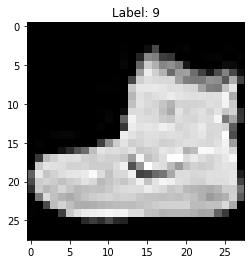

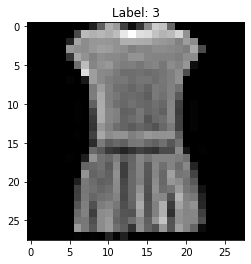

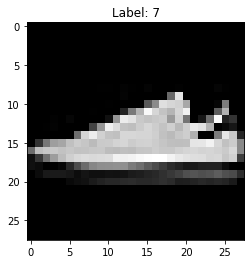

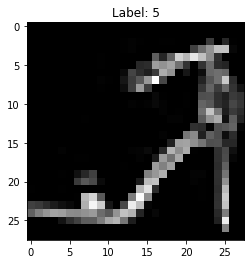

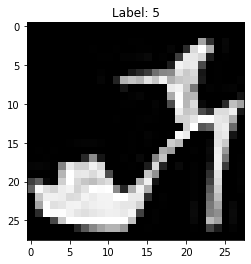

In [7]:
for k in range(5):
    plt.imshow(train_data[k].reshape(28, 28), cmap='gray')
    plt.title("Label: {}".format(train_labels[k]))
    plt.show()

#### Creating 30000 extra samples of the data using horizontal flip data augmentation on the original training dataset.

In [8]:
train_data_horizontal_flip = torch.flip(train_data, [3])
train_labels_horizontal_flip = train_labels

print("Train data shape: ", train_data_horizontal_flip.shape)
print("Train labels shape: ", train_labels_horizontal_flip.shape)

Train data shape:  torch.Size([30000, 1, 28, 28])
Train labels shape:  torch.Size([30000])


#### Plotting the first 5 images of the training dataset after horizontal flip data augmentation

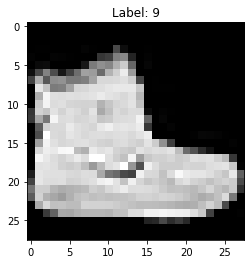

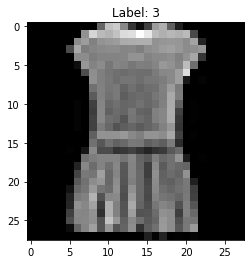

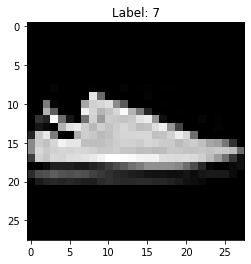

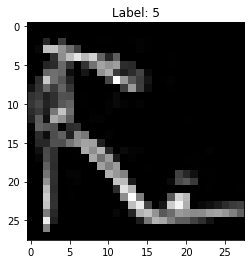

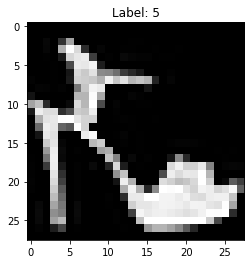

In [9]:
# Printing the first 5 images of the horizontal flip data
for k in range(5):
    plt.imshow(train_data_horizontal_flip[k].reshape(28, 28), cmap='gray')
    plt.title("Label: {}".format(train_labels_horizontal_flip[k]))
    plt.show()

#### Creating 30000 extra samples of the data using random noise data augmentation on the original training dataset.

In [10]:
train_data_random_noise = train_data + torch.randn(train_data.shape)
train_labels_random_noise = train_labels

print("Train data shape: ", train_data_random_noise.shape)
print("Train labels shape: ", train_labels_random_noise.shape)

Train data shape:  torch.Size([30000, 1, 28, 28])
Train labels shape:  torch.Size([30000])


#### Plotting the first 5 images of the training dataset after random noise data augmentation

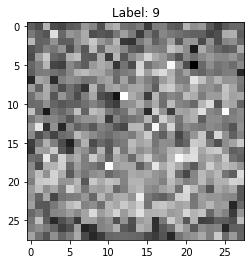

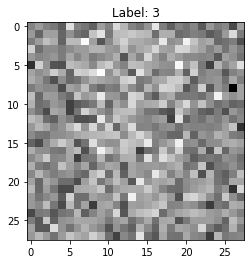

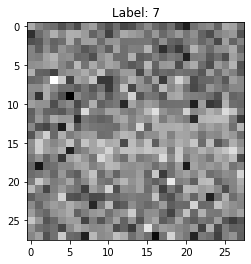

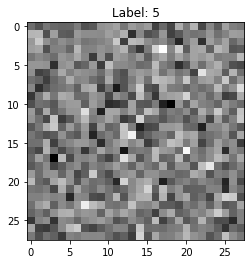

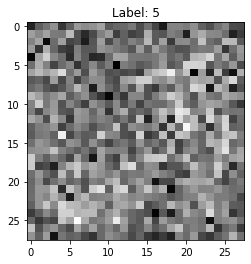

In [11]:
# Printing the first 5 images of the random noise data
for k in range(5):
    plt.imshow(train_data_random_noise[k].reshape(28, 28), cmap='gray')
    plt.title("Label: {}".format(train_labels_random_noise[k]))
    plt.show()

#### Creating 30000 extra samples of the data using random noise data augmentation on the flipped training dataset.

In [12]:
train_data_random_noise_horizontal_flip = train_data_horizontal_flip + torch.randn(train_data_horizontal_flip.shape)
train_labels_random_noise_horizontal_flip = train_labels_horizontal_flip

print("Train data shape: ", train_data_random_noise_horizontal_flip.shape)
print("Train labels shape: ", train_labels_random_noise_horizontal_flip.shape)

Train data shape:  torch.Size([30000, 1, 28, 28])
Train labels shape:  torch.Size([30000])


#### Plotting the first 5 images of the training dataset after random noise data augmentation on flipped dataset

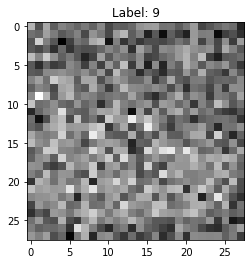

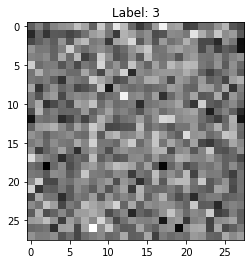

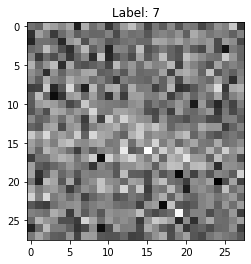

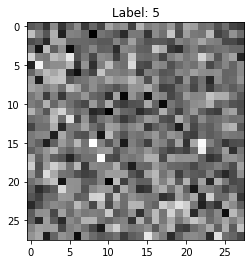

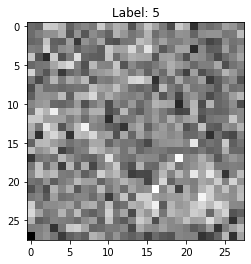

In [13]:
# Printing the first 5 images of the random noise horizontal flip data
for k in range(5):
    plt.imshow(train_data_random_noise_horizontal_flip[k].reshape(28, 28), cmap='gray')
    plt.title("Label: {}".format(train_labels_random_noise_horizontal_flip[k]))
    plt.show()

#### Concatenating the original training dataset, flipped training dataset, training dataset after random noise data augmentation and training dataset after random noise data augmentation on flipped dataset to create the final training dataset.

#### Here final training dataset is shuffled and testing dataset is not shuffled.

In [14]:
# Concatenating the original data with the horizontal flip data, random noise data and random noise horizontal flip data
train_data = torch.cat((train_data, train_data_horizontal_flip, train_data_random_noise, train_data_random_noise_horizontal_flip), 0)
train_labels = torch.cat((train_labels, train_labels_horizontal_flip, train_labels_random_noise, train_labels_random_noise_horizontal_flip), 0)

print("Train data shape: ", train_data.shape)
print("Train labels shape: ", train_labels.shape)

print("Test data shape: ", test_data.shape)
print("Test labels shape: ", test_labels.shape)

Train data shape:  torch.Size([120000, 1, 28, 28])
Train labels shape:  torch.Size([120000])
Test data shape:  torch.Size([5000, 1, 28, 28])
Test labels shape:  torch.Size([5000])


#### Creating the train and test dataloaders from the final training and test datasets with batch size = 100

In [15]:
train_loader = torch.utils.data.DataLoader(torch.utils.data.TensorDataset(train_data, train_labels), batch_size=100, shuffle=True)
test_loader = torch.utils.data.DataLoader(torch.utils.data.TensorDataset(test_data, test_labels), batch_size=100, shuffle=False)

for data, target in train_loader:
    print("Train data shape for 1 batch: ", data.shape)
    print("Train labels shape for 1 batch: ", target.shape)
    break

for data, target in test_loader:
    print("Test data shape for 1 batch: ", data.shape)
    print("Test labels shape for 1 batch: ", target.shape)
    break

Train data shape for 1 batch:  torch.Size([100, 1, 28, 28])
Train labels shape for 1 batch:  torch.Size([100])
Test data shape for 1 batch:  torch.Size([100, 1, 28, 28])
Test labels shape for 1 batch:  torch.Size([100])


#### Printing all the label classes from the dataset

In [16]:
print("Label classes: ", train_loader.dataset.tensors[1].unique())

Label classes:  tensor([1, 3, 5, 7, 9])


#### Sending the model to GPU if available

In [17]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

#### Defining the FashionCNN class with the architecture mentioned at the top of the notebook

In [18]:
class FashionCNN(nn.Module):
    def __init__(self):
        super(FashionCNN, self).__init__()
        self.conv1 = nn.Conv2d(
            in_channels=1, out_channels=10, kernel_size=5, padding=1) # Number of filters in the first convolutional layer = 10
        nn.init.kaiming_normal_(self.conv1.weight) # Initializing the weights of the first convolutional layer using Kaiming Normal Initialization also known as He Normal Initialization
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(
            in_channels=10, out_channels=20, kernel_size=5, padding=1)
        nn.init.kaiming_normal_(self.conv2.weight)
        self.conv3 = nn.Conv2d(
            in_channels=20, out_channels=40, kernel_size=5, padding=1)
        nn.init.kaiming_normal_(self.conv3.weight)
        self.conv4 = nn.Conv2d(
            in_channels=40, out_channels=64, kernel_size=5, padding=1)
        nn.init.kaiming_normal_(self.conv4.weight)
        
        self.fc = nn.Linear(in_features=64 * 10 * 10, out_features=256)
        nn.init.kaiming_normal_(self.fc.weight)
        self.fc_out = nn.Linear(in_features=256, out_features=10)
        nn.init.kaiming_normal_(self.fc_out.weight)

    def forward(self, x):
        x = F.relu(self.conv1(x)) # Applying ReLU activation function
        x = F.relu(self.conv2(x))
        x = F.relu(self.conv3(x))
        x = F.relu(self.conv4(x))
        x = self.pool(x)
        x = x.view(-1, 64 * 10 * 10)
        x = F.relu(self.fc(x))
        x = self.fc_out(x) 
        return x

#### Creating the FashionCNN object with loss function as CrossEntropyLoss and optimizer as Adam with learning rate = 0.001

In [19]:
model = FashionCNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

#### Defining the training loop for the FashionCNN model

In [20]:
def train_model(model, optimizer, epochs, train_loss, train_accuracy):
    for epoch in range(epochs):
        running_loss = 0.0
        correct = 0
        for data in train_loader:
            inputs, labels = data
            inputs, labels = inputs.to(device), labels.to(device)
        
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels.long())
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            correct += (predicted == labels).sum().item()
        avg_loss = running_loss/len(train_loader)
        avg_accuracy = correct/len(train_loader.dataset)
        train_loss.append(avg_loss)
        train_accuracy.append(avg_accuracy)
        print("Epoch:", epoch+1, "Training Loss: ", avg_loss, "\t Training Accuracy: ", avg_accuracy)
    print("Training complete!")
    return train_loss, train_accuracy

#### Training the FashionCNN model for 15 epochs

In [21]:
train_loss = []
train_accuracy = []
train_loss, train_accuracy = train_model(model, optimizer, 15, train_loss, train_accuracy)

Epoch: 1 Training Loss:  0.3534710417563717 	 Training Accuracy:  0.870725
Epoch: 2 Training Loss:  0.22605040815969307 	 Training Accuracy:  0.9133666666666667
Epoch: 3 Training Loss:  0.19856821841249864 	 Training Accuracy:  0.9231083333333333
Epoch: 4 Training Loss:  0.1783091788024952 	 Training Accuracy:  0.9304833333333333
Epoch: 5 Training Loss:  0.153611465493838 	 Training Accuracy:  0.9405166666666667
Epoch: 6 Training Loss:  0.12691788933239878 	 Training Accuracy:  0.9512333333333334
Epoch: 7 Training Loss:  0.09736129014675195 	 Training Accuracy:  0.96315
Epoch: 8 Training Loss:  0.07746061740908772 	 Training Accuracy:  0.970875
Epoch: 9 Training Loss:  0.06426467368068794 	 Training Accuracy:  0.975825
Epoch: 10 Training Loss:  0.05446620420009519 	 Training Accuracy:  0.9801
Epoch: 11 Training Loss:  0.04787763522200597 	 Training Accuracy:  0.9827166666666667
Epoch: 12 Training Loss:  0.041956090123033696 	 Training Accuracy:  0.984775
Epoch: 13 Training Loss:  0.042

#### Plotting the training loss and accuracy curves for the Fashion CNN model using ReLU after 15 epochs

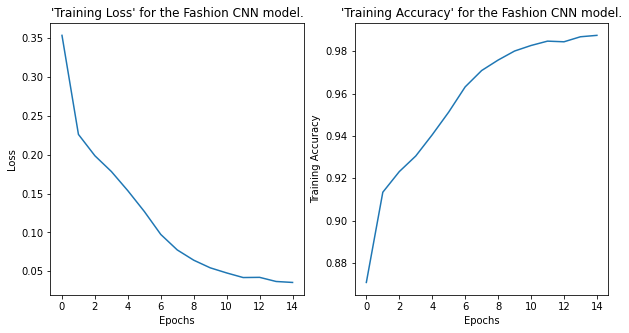

In [22]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(train_loss)
plt.title("'Training Loss' for the Fashion CNN model.")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.subplot(1, 2, 2)
plt.plot(train_accuracy)
plt.title("'Training Accuracy' for the Fashion CNN model.")
plt.xlabel("Epochs")
plt.ylabel("Training Accuracy")
plt.show()

#### Testing the FashionCNN model on the test dataset and calculating the test accuracy

In [23]:
test_loss = []
test_accuracy = []
model.eval()
with torch.no_grad():
    for data in test_loader:
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        loss = criterion(outputs, labels.long())
        test_loss.append(loss.item())
        _, predicted = torch.max(outputs, 1)
        correct = (predicted == labels).sum().item()
        test_accuracy.append(correct/len(labels))

print("Testing Complete!")
print("Test Loss: ", np.mean(test_loss), "\tTest Accuracy: ", np.mean(test_accuracy))

Testing Complete!
Test Loss:  0.08644653497263789 	Test Accuracy:  0.9791999999999998


### Question - 2

Training an AutoEncoder on the same dataset as above with target classes = ['1', '2', '3', '4', '5'] and using the following hyperparameters:
    
        1. Batch size = 100
        2. Learning rate = 0.001
        3. Optimizer = Adam
        4. Loss function = MSELoss for the decoder and CrossEntropyLoss for the classifier
        5. Activation function = ReLU
        6. Number of epochs = 15
        7. Number of encoding layers = 4
        8. Number of decoding layers = 4
        9. Number of fully connected layers = 1 with 256 neurons
        10. Size of input layer = 28*28 = 784 neurons
        11. Size of Encoding layer 1 = 784/2 = 392 neurons
        12. Size of Encoding layer 2 = 392/2 = 196 neurons
        13. Size of Encoding layer 3 = 196/2  = 98 neurons
        14. Size of Encoding layer 4 = 98 neurons
        15  Size of Decoding layer 1 = 98 neurons
        16. Size of Decoding layer 2 = 196 neurons
        17. Size of Decoding layer 3 = 392 neurons
        18. Size of Decoding layer 4 = 784 neurons
        19. One output layer is present after the Fully connected layer for classification.
        

Note: We are using the same augmented dataset as above for training the AutoEncoder.

#### Defining the AutoEncoder class with the architecture mentioned above

In [24]:
class AutoEncoder(nn.Module):
    def __init__(self, input_size, output_size): # input_size = 784, output_size = 32
        super(AutoEncoder, self).__init__() # Initializing the parent class 
        self.encoder_1 = nn.Linear(in_features = input_size,out_features = int(input_size/2)), # 784 -> 392
        self.encoder_1 = self.encoder_1[0]
        nn.init.kaiming_normal_(self.encoder_1.weight), # Initializing the weights of the first encoder layer using Kaiming Normal Initialization also known as He Normal Initialization

        self.encoder_2 = nn.Linear(int(input_size/2), int(input_size/4)), # 392 -> 196
        self.encoder_2 = self.encoder_2[0]
        nn.init.kaiming_normal_(self.encoder_2.weight),

        self.encoder_3 = nn.Linear(int(input_size/4), int(input_size/8)), # 196 -> 98
        self.encoder_3 = self.encoder_3[0]
        nn.init.kaiming_normal_(self.encoder_3.weight),

        self.encoder_4 = nn.Linear(int(input_size/8), output_size), # 98 -> 32
        self.encoder_4 = self.encoder_4[0]
        nn.init.kaiming_normal_(self.encoder_4.weight),


        self.decoder_1 = nn.Linear(output_size, int(input_size/8)), # 32 -> 98
        self.decoder_1 = self.decoder_1[0]
        nn.init.kaiming_normal_(self.decoder_1.weight),

        self.decoder_2 = nn.Linear(int(input_size/8), int(input_size/4)), # 98 -> 196
        self.decoder_2 = self.decoder_2[0]
        nn.init.kaiming_normal_(self.decoder_2.weight),

        self.decoder_3 = nn.Linear(int(input_size/4), int(input_size/2)), # 196 -> 392
        self.decoder_3 = self.decoder_3[0]
        nn.init.kaiming_normal_(self.decoder_3.weight),

        self.decoder_4 = nn.Linear(int(input_size/2), input_size), # 392 -> 784
        self.decoder_4 = self.decoder_4[0]
        nn.init.kaiming_normal_(self.decoder_4.weight),


        self.fc = nn.Linear(in_features = output_size, out_features=256) # 32 -> 256
        nn.init.kaiming_normal_(self.fc.weight)
        self.fc_out = nn.Linear(in_features=256, out_features=10) # 256 -> 10
        nn.init.kaiming_normal_(self.fc_out.weight)
    
    def fully_connected_layer(self, x):
        x = F.relu(self.fc(x)) # ReLU activation function
        x = self.fc_out(x)
        return x

    def encoder_func(self, x):
        x = F.relu(self.encoder_1(x)) 
        x = F.relu(self.encoder_2(x))
        x = F.relu(self.encoder_3(x))
        x = F.relu(self.encoder_4(x))
        return x

    def decoder_func(self, x):
        x = F.relu(self.decoder_1(x))
        x = F.relu(self.decoder_2(x))
        x = F.relu(self.decoder_3(x))
        x = F.relu(self.decoder_4(x))
        return x

    def forward(self, x):
        encoded_layer = self.encoder_func(x)
        decoded_layer = self.decoder_func(encoded_layer)
        return decoded_layer

#### Creating the AutoEncoder object with loss function as MSELoss for the decoder and optimizer as Adam with learning rate = 0.001

In [25]:
modelAE = AutoEncoder(input_size = 784, output_size = 32).to(device)
criterion = nn.MSELoss()
optimizerAE = optim.Adam(modelAE.parameters(), lr=0.001)

#### Defining the training loop for the AutoEncoder model (Unsupervised Learning)

In [26]:
def train_modelAE(model, optimizer, epochs, train_loss, output):
    for epoch in range(epochs):
        running_loss = 0.0
        correct = 0
        for data in train_loader:
            inputs, labels = data
            inputs = inputs.view(-1, 784)
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model.forward(inputs)
            loss = criterion(outputs, inputs)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
        avg_loss = running_loss/len(train_loader)
        train_loss.append(avg_loss)
        output.append((epoch+1, inputs, outputs))
        print("Epoch:", epoch+1, "Training Loss: ", avg_loss)
    print("Training complete!")
    return train_loss, output

### Training the Autoencoder and calculating the training losses for 15 epochs

In [27]:
train_lossAE = []
outputAE = []
train_lossAE, outputAE = train_modelAE(modelAE, optimizerAE, 15, train_lossAE, outputAE)

Epoch: 1 Training Loss:  0.5428031315406163
Epoch: 2 Training Loss:  0.5283632509410381
Epoch: 3 Training Loss:  0.5256485698372125
Epoch: 4 Training Loss:  0.5238802583267291
Epoch: 5 Training Loss:  0.5226027616610129
Epoch: 6 Training Loss:  0.5216171885281802
Epoch: 7 Training Loss:  0.5208787863701582
Epoch: 8 Training Loss:  0.5201684114088615
Epoch: 9 Training Loss:  0.5197287644942602
Epoch: 10 Training Loss:  0.5194191658000151
Epoch: 11 Training Loss:  0.5189099968721469
Epoch: 12 Training Loss:  0.5183514662335317
Epoch: 13 Training Loss:  0.5180820967257023
Epoch: 14 Training Loss:  0.5178501268227895
Epoch: 15 Training Loss:  0.517457437167565
Training complete!


#### Plotting the training loss curve for the AutoEncoder model after 15 epochs

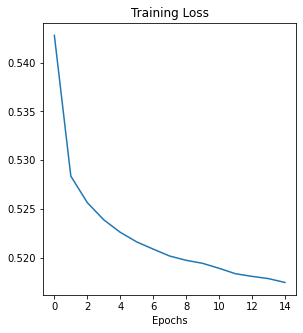

In [28]:
# Plotting the training loss
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(train_lossAE)
plt.title("Training Loss")
plt.xlabel("Epochs")
plt.show()

#### Plotting the first 5 images of the training dataset and their corresponding reconstructed images

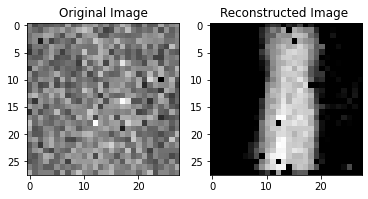

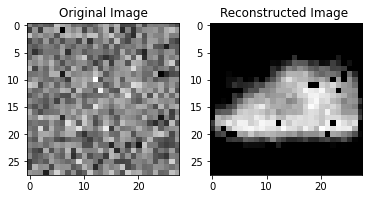

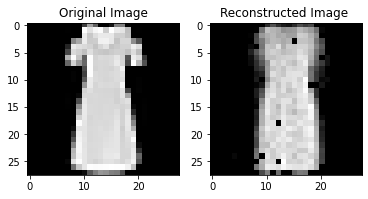

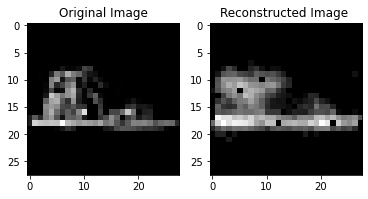

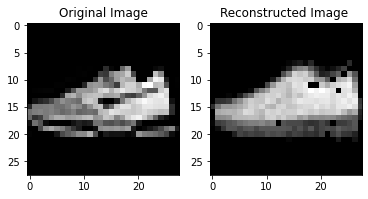

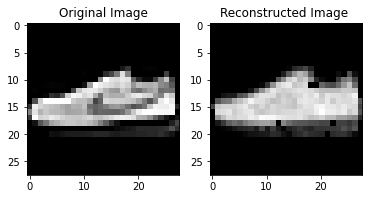

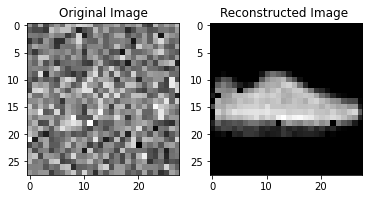

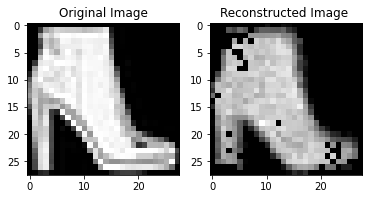

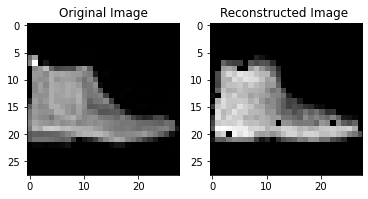

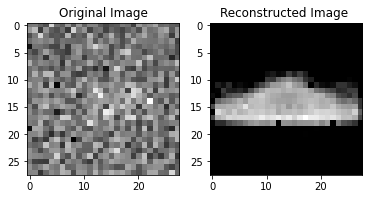

In [29]:
# Plotting the output of the autoencoder
for i in range(10):
    plt.subplot(1,2,1)
    plt.imshow(outputAE[i][1].cpu().detach().numpy()[0].reshape(28,28), cmap='gray')
    plt.title("Original Image")
    plt.subplot(1,2,2)
    plt.imshow(outputAE[i][2].cpu().detach().numpy()[0].reshape(28,28), cmap='gray')
    plt.title("Reconstructed Image ")
    plt.show()

#### Creating the object of the AutoEncoder class but for classification task. Here we only use the encoder part of the AutoEncoder model and add a fully connected layer with 256 neurons and an output layer with 5 neurons for classification.

In [30]:
modelAEclassifier = AutoEncoder(784, 32).to(device)
criterion = nn.CrossEntropyLoss()
optimizerAEclassifier = optim.Adam(modelAEclassifier.parameters(), lr=0.001)

### Training the classifier with the encoder part of the AutoEncoder model and calculating the training losses and training accuracies for 15 epochs

In [31]:
def train_classifier(modelAE, optimizer, epochs, train_loss, train_accuracy):
    for epoch in range(epochs):
        running_loss = 0.0
        correct = 0
        for data in train_loader:
            inputs, labels = data
            inputs = inputs.view(-1, 784)
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            encoded_layer = modelAE.encoder_func(inputs)
            outputs = modelAE.fully_connected_layer(encoded_layer)
            loss = criterion(outputs, labels.long())
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            correct += (predicted == labels).sum().item()
        avg_loss = running_loss/len(train_loader)
        avg_accuracy = correct/len(train_loader.dataset)
        train_loss.append(avg_loss)
        train_accuracy.append(avg_accuracy)
        print("Epoch:", epoch+1, "Training Loss: ", avg_loss, "\t Training Accuracy: ", avg_accuracy)
    print("Training complete!")
    return train_loss, train_accuracy

In [32]:
train_lossAE_classifier = []
train_accuracyAE_classifier = []
train_lossAE_classifier, train_accuracyAE_classifier = train_classifier(modelAEclassifier, optimizerAEclassifier, 15, train_lossAE_classifier, train_accuracyAE_classifier)

Epoch: 1 Training Loss:  0.3660765428468585 	 Training Accuracy:  0.8580166666666666
Epoch: 2 Training Loss:  0.23838819526756802 	 Training Accuracy:  0.9086833333333333
Epoch: 3 Training Loss:  0.17299363777972757 	 Training Accuracy:  0.9357166666666666
Epoch: 4 Training Loss:  0.12297050280496478 	 Training Accuracy:  0.9555
Epoch: 5 Training Loss:  0.0956021636351943 	 Training Accuracy:  0.9655833333333333
Epoch: 6 Training Loss:  0.0785913672996685 	 Training Accuracy:  0.9722583333333333
Epoch: 7 Training Loss:  0.07234004121817028 	 Training Accuracy:  0.9741083333333334
Epoch: 8 Training Loss:  0.06447521705568458 	 Training Accuracy:  0.9772083333333333
Epoch: 9 Training Loss:  0.057328303405083714 	 Training Accuracy:  0.9796083333333333
Epoch: 10 Training Loss:  0.05291202312713722 	 Training Accuracy:  0.9808666666666667
Epoch: 11 Training Loss:  0.051357901082374154 	 Training Accuracy:  0.981875
Epoch: 12 Training Loss:  0.048778718973044304 	 Training Accuracy:  0.9831

#### Plotting the training loss and accuracy curves for the AutoEncoder model after 15 epochs

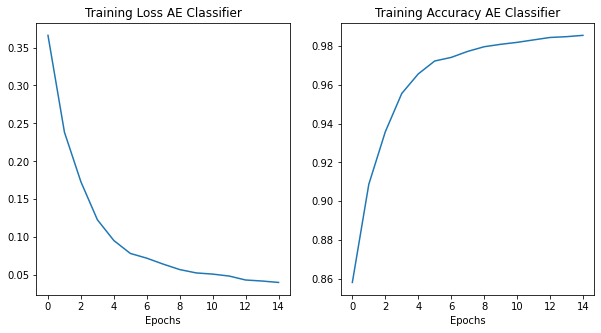

In [33]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(train_lossAE_classifier)
plt.title("Training Loss AE Classifier")
plt.xlabel("Epochs")
plt.subplot(1,2,2)
plt.plot(train_accuracyAE_classifier)
plt.title("Training Accuracy AE Classifier")
plt.xlabel("Epochs")
plt.show()

#### Testing the AutoEncoder model on the test dataset and calculating the test accuracy

In [34]:
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        images = images.view(-1, 784)
        images, labels = images.to(device), labels.to(device)
        encoded_layer = modelAEclassifier.encoder_func(images)
        outputs = modelAEclassifier.fully_connected_layer(encoded_layer)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
test_accuracyAE_classifier = 100 * correct / total
print('Accuracy of the network on the 5000 test images with 15 epochs: %d %%' % (test_accuracyAE_classifier))

Accuracy of the network on the 5000 test images with 15 epochs: 97 %


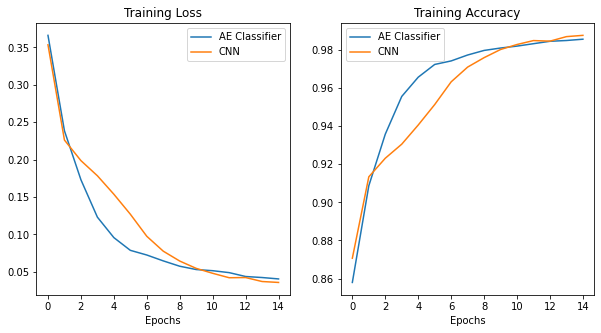

In [35]:
# Comparing loss and accuracy of CNN and AE classifier
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(train_lossAE_classifier, label="AE Classifier")
plt.plot(train_loss, label="CNN")
plt.title("Training Loss")
plt.xlabel("Epochs")
plt.legend()
plt.subplot(1,2,2)
plt.plot(train_accuracyAE_classifier, label="AE Classifier")
plt.plot(train_accuracy, label="CNN")
plt.title("Training Accuracy")
plt.xlabel("Epochs")
plt.legend()
plt.show()

In [36]:
# Comparing the test accuracy of CNN and AE classifier
print("Test Accuracy of CNN: ", 100*np.mean(test_accuracy))
print("Test Accuracy of AE Classifier: ", test_accuracyAE_classifier) 

Test Accuracy of CNN:  97.91999999999999
Test Accuracy of AE Classifier:  97.12


___